In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read Data into a Dataframe
df = pd.read_csv('creditcard.csv')

In [ ]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V27,V28,Amount,class
count,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,...,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232311.000000,232310.000000,232310.000000,232310.000000,232310.000000
mean,80333.653361,-0.062455,-0.016379,0.163462,0.040495,-0.057472,0.027759,-0.023818,0.003139,0.002559,...,0.009228,-0.005363,-0.020180,-0.009307,0.000599,0.034471,0.000058,0.001748,91.075422,0.001817
std,40196.184359,1.954980,1.671815,1.498051,1.413307,1.377028,1.324585,1.230695,1.207787,1.121425,...,0.786914,0.744048,0.710709,0.640626,0.606449,0.510210,0.402867,0.334461,252.636126,0.042582
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-22.565679,-11.710896,0.000000,0.000000
25%,48221.500000,-0.946559,-0.603264,-0.603248,-0.827822,-0.743934,-0.735703,-0.567583,-0.196875,-0.660010,...,-0.203524,-0.225448,-0.533375,-0.166724,-0.349540,-0.276643,-0.069875,-0.048541,6.000000,0.000000
50%,74166.000000,-0.026944,0.066098,0.353377,0.035614,-0.116262,-0.240856,0.012619,0.032383,-0.065481,...,-0.052013,-0.033846,-0.009447,-0.021959,0.047010,0.070676,0.003195,0.015506,23.450000,0.000000
75%,121831.500000,1.246186,0.780971,1.142484,0.828213,0.540351,0.430975,0.536444,0.331767,0.611950,...,0.144432,0.170397,0.477328,0.128544,0.428296,0.371670,0.089164,0.078076,79.990000,0.000000
max,147123.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [ ]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

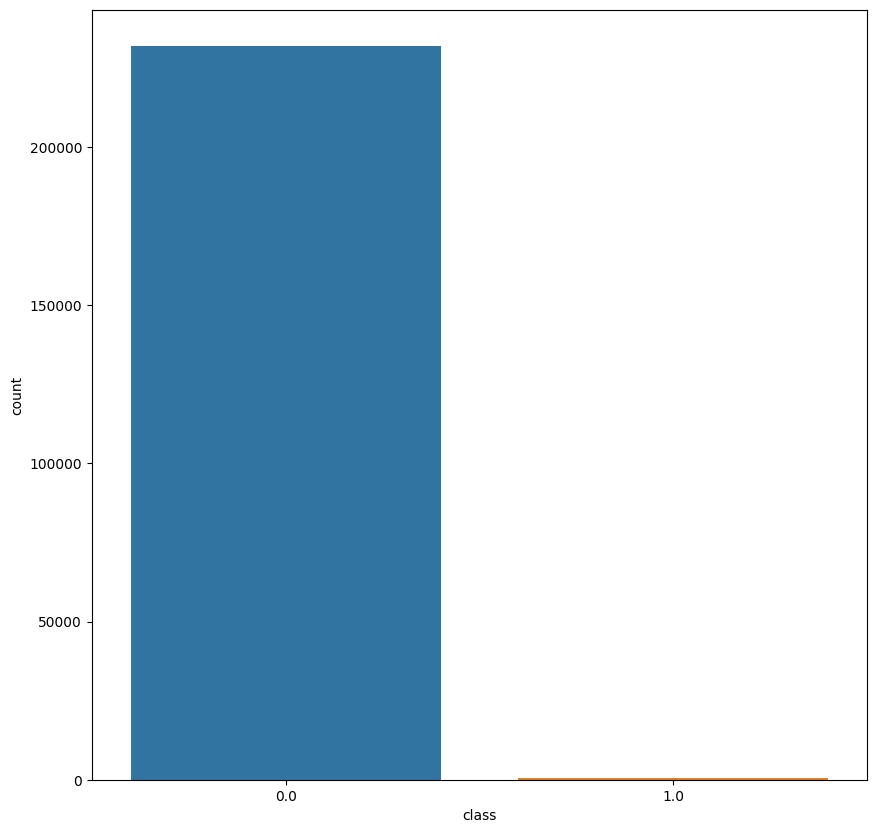

In [ ]:
countplot_data(df, df['class'])


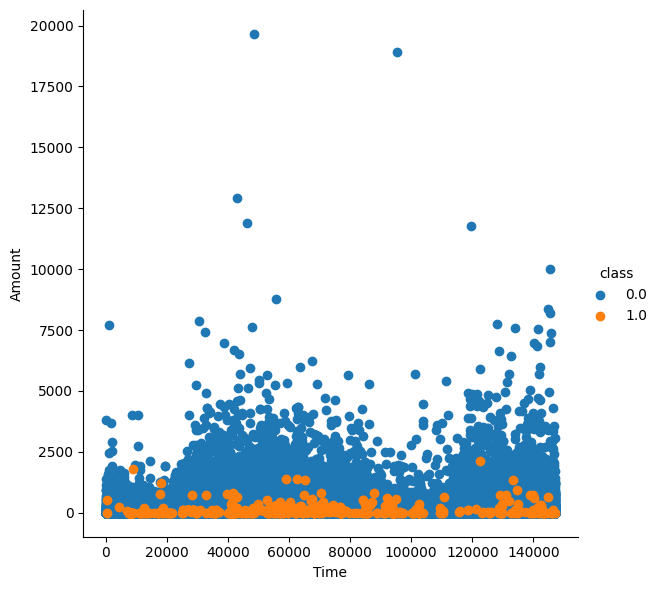

In [ ]:
target = "class"
data = df
feature1 = "Time"  # Replace with the actual name of the first feature you want to use
feature2 = "Amount"
sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()

In [ ]:
df_refine = pd.read_csv('creditcard.csv')  # Replace 'creditcard.csv' with the path to your CSV file

amount_more = 0
amount_less = 0

for i in range(df_refine.shape[0]):
    if df_refine.iloc[i]["Amount"] < 2500:
        amount_less += 1
    else:
        amount_more += 1

print("Amounts less than 2500:", amount_less)
print("Amounts greater than or equal to 2500:", amount_more)

Amounts less than 2500: 275251
Amounts greater than or equal to 2500: 442


In [ ]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

118.48384277972201

In [ ]:
fraud = 0
legitimate = 1
for i in range(df_refine.shape[0]):
    if(df_refine.iloc[i]["Amount"]<2500):
        if(df_refine.iloc[i]["class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

484
274768


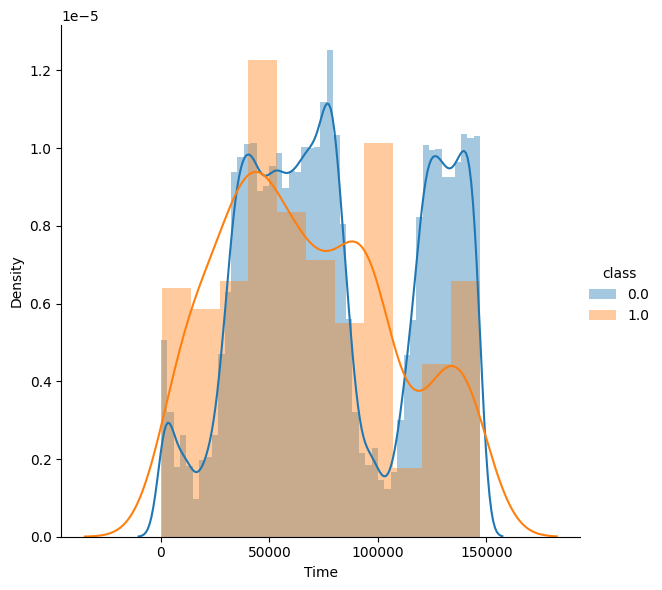

In [ ]:
df_refine = df[["Time", "Amount", "class"]]
sns.FacetGrid(df_refine, hue="class", height=6).map(sns.distplot, "Time").add_legend()
plt.show()

In [ ]:
# Create Train and Test Data in ratio 70:30
X = df.drop(labels='class', axis=1) # Features
y = df.loc[:,'class']               # Target Variable

# Check for missing values in y
print(y.isnull().sum())

# Remove or impute missing values in y
X = X[~y.isnull()]  # Remove rows with missing target values
y = y.dropna()      # Remove the corresponding rows in the target variable

# Confirm that y no longer has missing values
print(y.isnull().sum())

# Create Train and Test Data in ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


1
0


In [ ]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)


In [ ]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)

def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))

    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))

    print('F1-Score')
    print(f1_score(y_test, y_pred))

    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [ ]:
# The parameters of each classifier are different
# Hence, we do not make use of a single method and this is not to violate DRY Principles
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
print(grid_sgd)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(

In [ ]:
grid_eval(grid_sgd)


Best Score 0.9560162686072134
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


In [ ]:
evaluation(y_test, grid_sgd, X_test)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.91      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.62     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.9479720619851928
F1-Score
0.2460973370064279
Accuracy
0.990391254988706


In [ ]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
MCC_scorer = make_scorer(matthews_corrcoef)
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
print(grid_rf)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)


In [ ]:
grid_eval(grid_rf)

Best Score 0.9997905583638133
Best Parameter {'model__n_estimators': 75}


In [ ]:
evaluation(y_test, grid_rf, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     69566
         1.0       0.86      0.84      0.85       127

    accuracy                           1.00     69693
   macro avg       0.93      0.92      0.92     69693
weighted avg       1.00      1.00      1.00     69693

AUC-ROC
0.9211304689751374
F1-Score
0.8492063492063492
Accuracy
0.9994547515532406


In [ ]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
print(grid_lr)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)


In [ ]:
grid_eval(grid_lr)


Best Score 0.959801520447091
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [ ]:
evaluation(y_test, grid_lr, X_test)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.91      0.26       148

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.63     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.948212404326479
F1-Score
0.2557251908396946
Accuracy
0.9908711070538253


In [ ]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
print(grid_knn)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)


In [ ]:
grid_eval(grid_knn)


Best Score 0.9980623930056313
Best Parameter {'model__p': 2}


In [ ]:
evaluation(y_test, grid_knn, X_test)


NameError: ignored

In [ ]:
# Assuming you already have trained the model and stored it in 'grid_rf'
# Create a DataFrame with the features for the single data point

single_data_point = pd.read_csv('Fraud.csv')

# Use the existing 'grid_rf' model to make a prediction for the single data point
prediction = grid_rf.predict(single_data_point)

# Check the prediction
if prediction[0] == 1:
    print("The transaction is predicted as FRAUD.")
else:
    print("The transaction is predicted as NOT FRAUD.")


The transaction is predicted as FRAUD.


In [ ]:
# Assuming you already have trained the model and stored it in 'grid_rf'
# Create a DataFrame with the features for the single data point
pd.read_csv('creditcard.csv')
single_data_point = pd.read_csv('Not_Fraud.csv')

# Use the existing 'grid_rf' model to make a prediction for the single data point
prediction = grid_rf.predict(single_data_point)

# Check the prediction
if prediction[0] == 1:
    print("The transaction is predicted as FRAUD.")
else:
    print("The transaction is predicted as NOT FRAUD.")

The transaction is predicted as NOT FRAUD.
